# <h2><center> Importation of Libraries<center><h2>

In [1]:
# importation of libaries
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(10,10)

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


<center><h2>Loading and Preprocessing of Dataset</h2></center>

In [2]:
# display of train dataset
df_train = pd.read_csv("loan_train (2).csv")
df_train.head(10)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0
5,6,34,2.0,Aadhar,779784,902040,0,0,0,1
6,7,27,2.0,Aadhar,449268,847896,0,0,0,0
7,8,27,2.0,Aadhar,582036,905604,0,0,0,1
8,9,30,1.0,Aadhar,712956,866292,0,0,0,0
9,10,46,2.0,Aadhar,554988,761724,3,0,0,1


In [3]:
df_train.shape

(7000, 10)

In [4]:
# displaying the total count for each column
df_train[df_train["proof_submitted"] == "Aadhar" ].count()

loan_id             5931
age                 5931
education           5705
proof_submitted     5931
loan_amount         5931
asset_cost          5931
no_of_loans         5931
no_of_curr_loans    5931
last_delinq_none    5931
loan_default        5931
dtype: int64

In [5]:
# display of the test data set
df_test = pd.read_csv("loan_test.csv")
df_test.head(10)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0
5,7006,41,1.0,Aadhar,608436,793200,2,2,0
6,7007,37,1.0,Aadhar,589740,894000,22,12,0
7,7008,29,1.0,Aadhar,708156,844260,0,0,0
8,7009,42,1.0,Aadhar,796584,978000,0,0,0
9,7010,27,1.0,Aadhar,752556,920724,0,0,0


In [6]:
df_test.shape

(3000, 9)

In [7]:
# from this information below we have 0 to 7000 entries and 9 columns nor of our column as missing values except from education
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [8]:
# from this information below we have 0 to 3000 entries and 8 columns nor of our column as missing values except from education
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           3000 non-null   int64  
 1   age               3000 non-null   int64  
 2   education         2908 non-null   float64
 3   proof_submitted   3000 non-null   object 
 4   loan_amount       3000 non-null   int64  
 5   asset_cost        3000 non-null   int64  
 6   no_of_loans       3000 non-null   int64  
 7   no_of_curr_loans  3000 non-null   int64  
 8   last_delinq_none  3000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 211.1+ KB


In [9]:
df_train.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [10]:
df_test.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none'],
      dtype='object')

<h2> <center> Cleaning Of The Dataset </center> <h3>

In [11]:
df_train.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


In [12]:
df_train.isna().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [13]:
mean_value = df_train["education"] .mean()
print(mean_value)

1.5619541080680976


In [14]:
df_train["education"].fillna(mean_value, inplace=True)

In [15]:
df_train.isna().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [16]:
df_train.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [17]:
df_test.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
count,3000.000000,3000.000000,2908.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,8500.500000,36.111000,1.563618,6.629294e+05,9.106000e+05,2.819000,1.374333,0.014333
std,866.169729,7.467347,0.496022,1.451009e+05,2.070278e+05,5.329575,2.218825,0.118881
min,7001.000000,21.000000,1.000000,1.696800e+05,4.706040e+05,0.000000,0.000000,0.000000
25%,7750.750000,30.000000,1.000000,5.801880e+05,7.930710e+05,0.000000,0.000000,0.000000
50%,8500.500000,36.000000,2.000000,6.541560e+05,8.569080e+05,0.000000,0.000000,0.000000
75%,9250.250000,42.000000,2.000000,7.315590e+05,9.501360e+05,4.000000,2.000000,0.000000
max,10000.000000,50.000000,2.000000,1.576920e+06,2.358180e+06,92.000000,32.000000,1.000000


In [18]:
df_test.isna().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [19]:
mean_value = df_test["education"] .mean()
print(mean_value)

1.5636176066024758


In [20]:
df_test["education"].fillna(mean_value, inplace=True)

In [21]:
df_test.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64

<h2> <center> Visualizaton Of The Dataset </center> <h2>

### Train Dataset Visualization

<Figure size 200x1000 with 0 Axes>

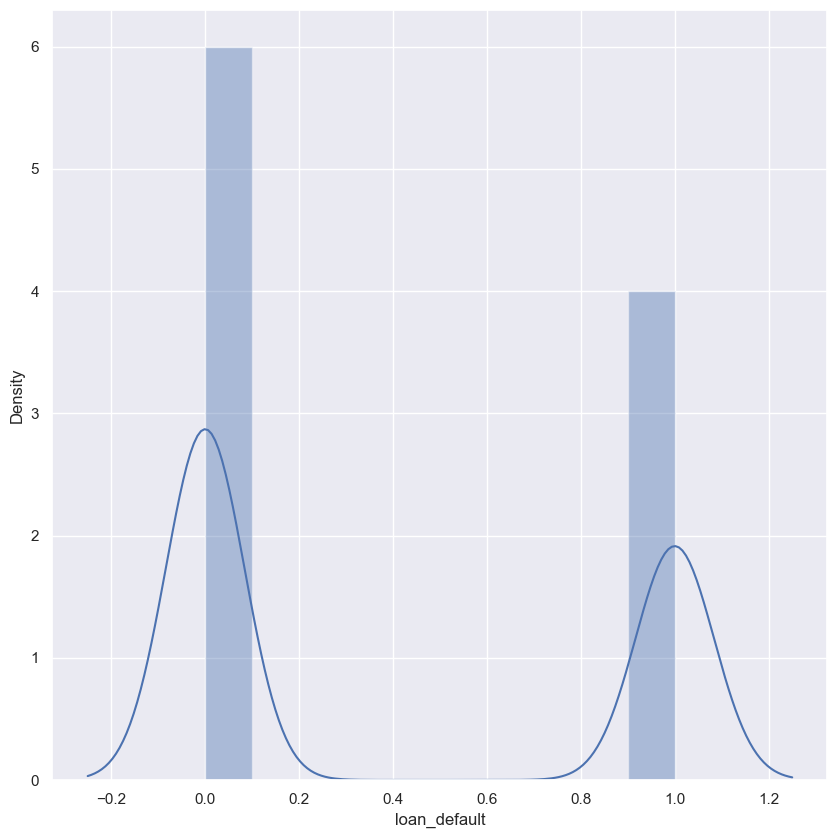

<Figure size 200x1000 with 0 Axes>

In [22]:
sns.distplot(df_train['loan_default'])
plt.figure(figsize=(2,10))

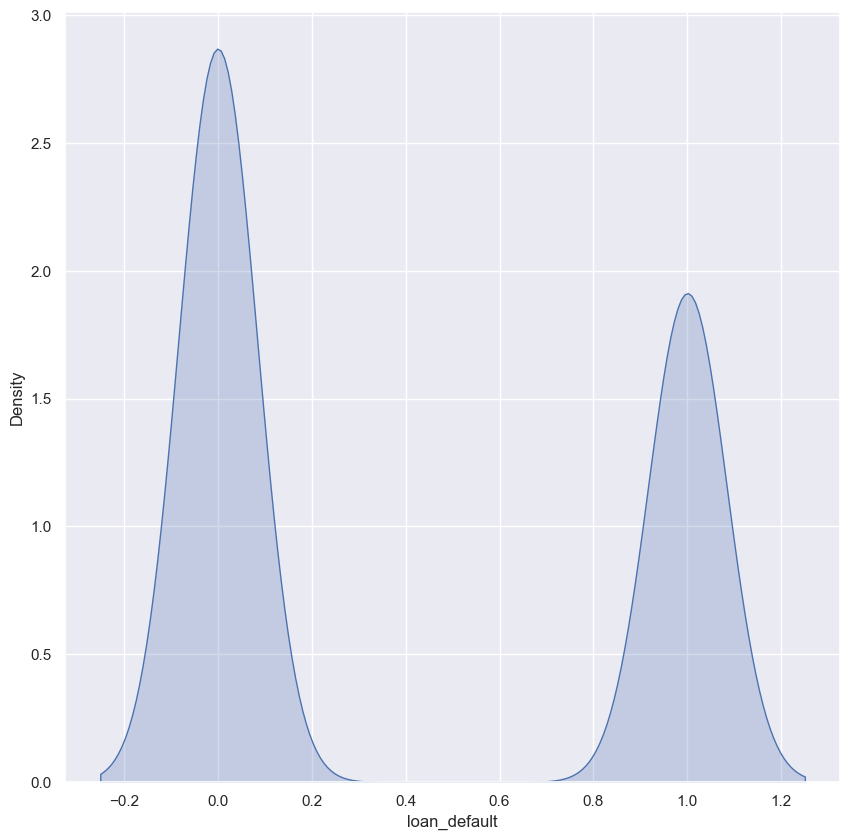

In [23]:
sns.kdeplot(df_train['loan_default'], shade=True);
plt.rcParams['figure.figsize'] = (10,10)

<Figure size 1000x1000 with 0 Axes>

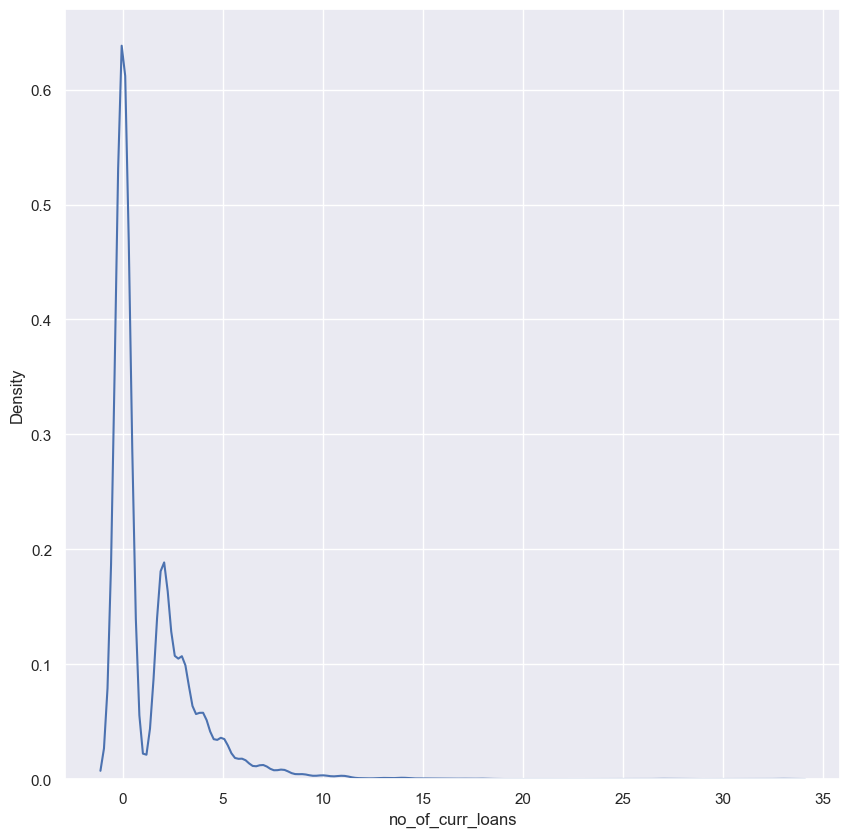

<Figure size 1000x1000 with 0 Axes>

In [24]:
sns.kdeplot(df_train['no_of_curr_loans'])
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

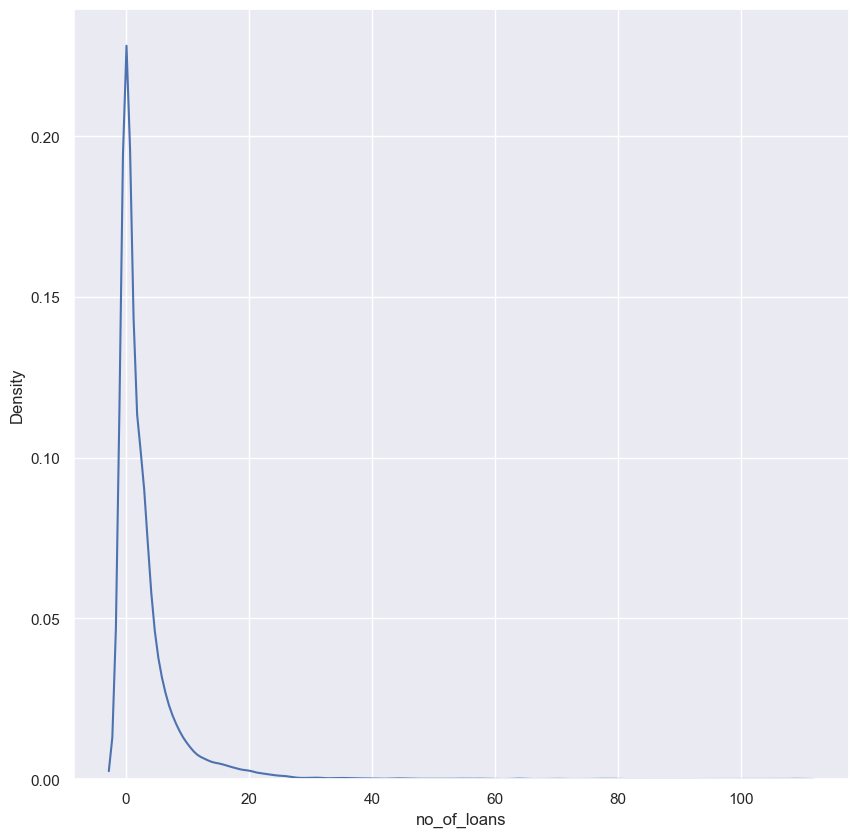

<Figure size 1000x1000 with 0 Axes>

In [25]:
sns.kdeplot(df_train['no_of_loans'])
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

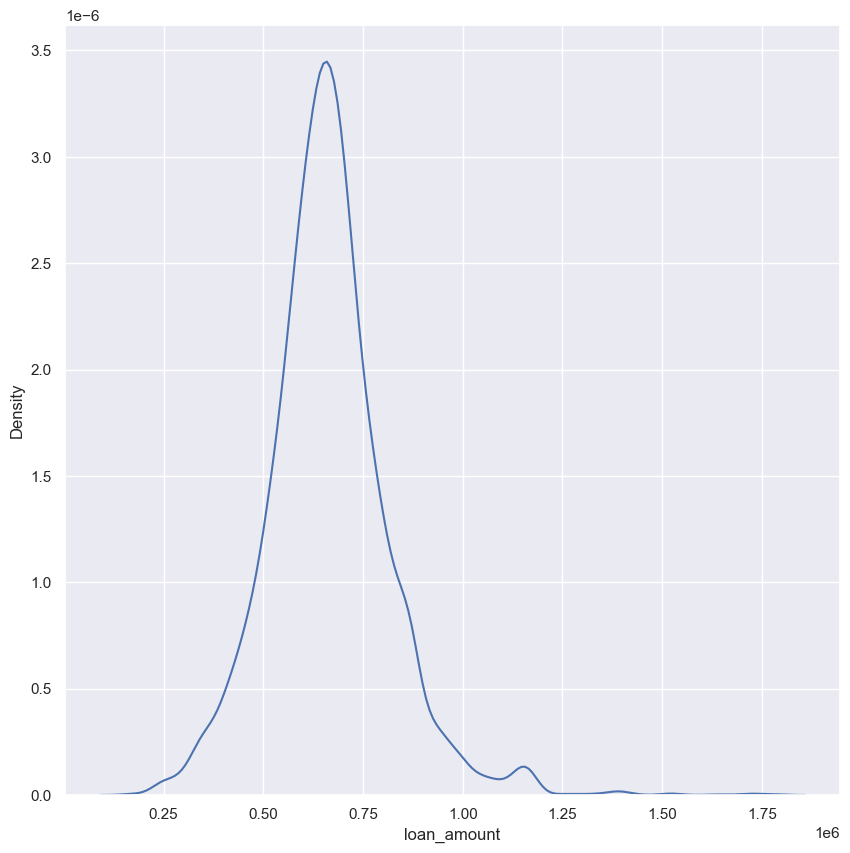

<Figure size 1000x1000 with 0 Axes>

In [26]:
sns.kdeplot(df_train['loan_amount'])
plt.figure(figsize=(10,10))

In [27]:
df_train["no_of_curr_loans"].unique()

array([ 2,  0,  3,  4,  8,  6,  7,  5,  9, 11, 27, 10, 16, 17, 13, 14, 33,
       20, 18, 12, 15], dtype=int64)

<Axes: xlabel='no_of_curr_loans', ylabel='loan_amount'>

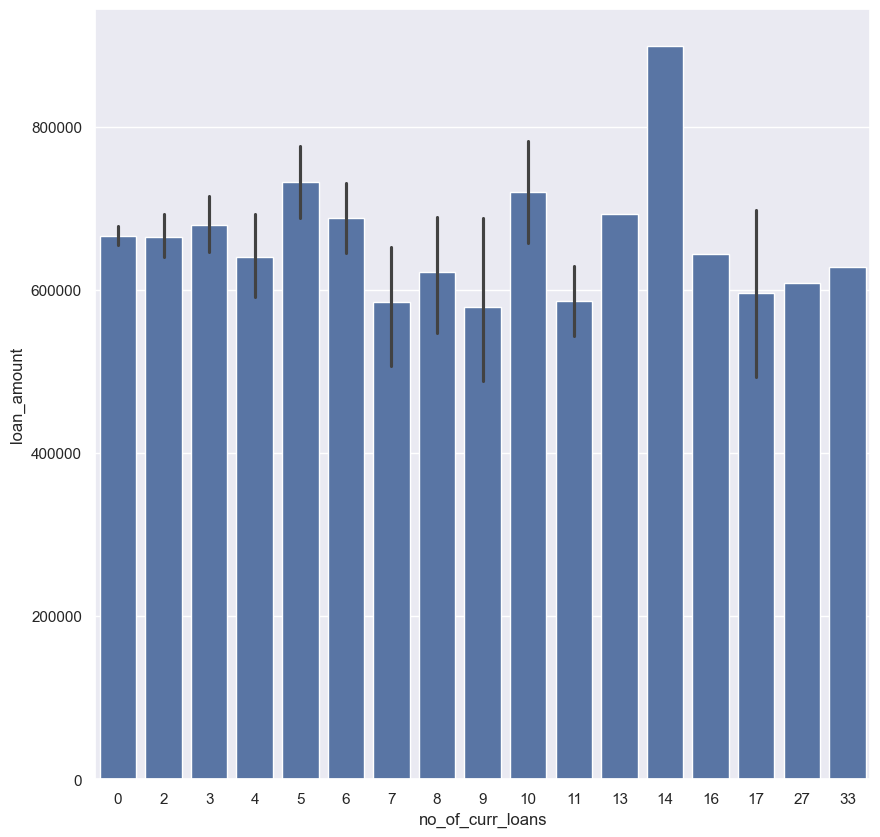

In [28]:
sns.barplot(y="loan_amount", x="no_of_curr_loans",data= df_train[:1000] , orient = "vertical")

<Axes: xlabel='no_of_loans', ylabel='loan_amount'>

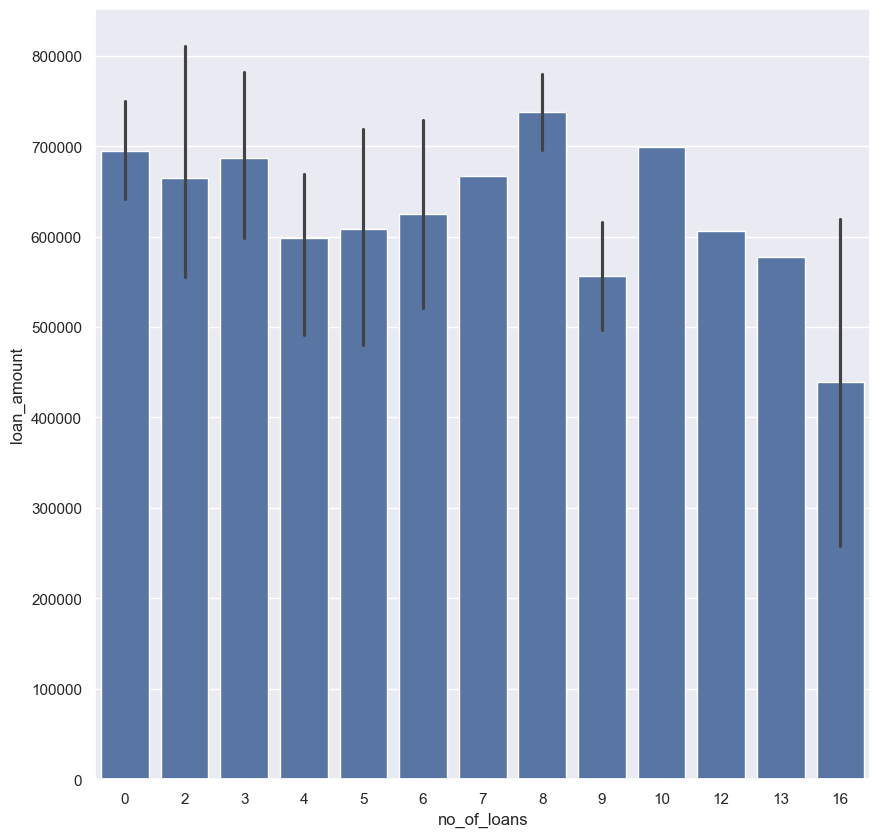

In [29]:
sns.barplot(y="loan_amount", x="no_of_loans",data= df_train[:100] , orient = "vertical")

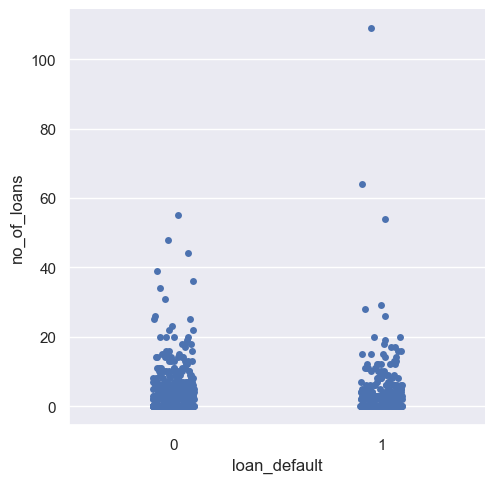

In [30]:
#sns.(y="no_of_loans", x="loan_default",data= df_train[:10] , orient = "vertical")
sns.catplot(y="no_of_loans", x="loan_default", kind='strip',data=df_train[:1000]);

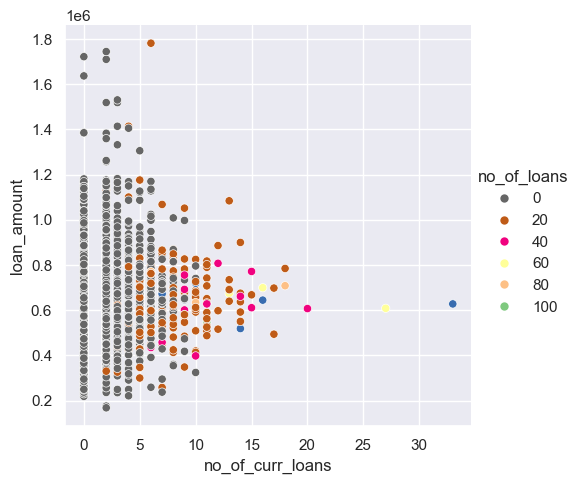

In [31]:
sns.relplot(x="no_of_curr_loans", y="loan_amount", hue="no_of_loans",data=df_train, palette="Accent_r")

### Test Dataset Visualization

In [32]:
df_test.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


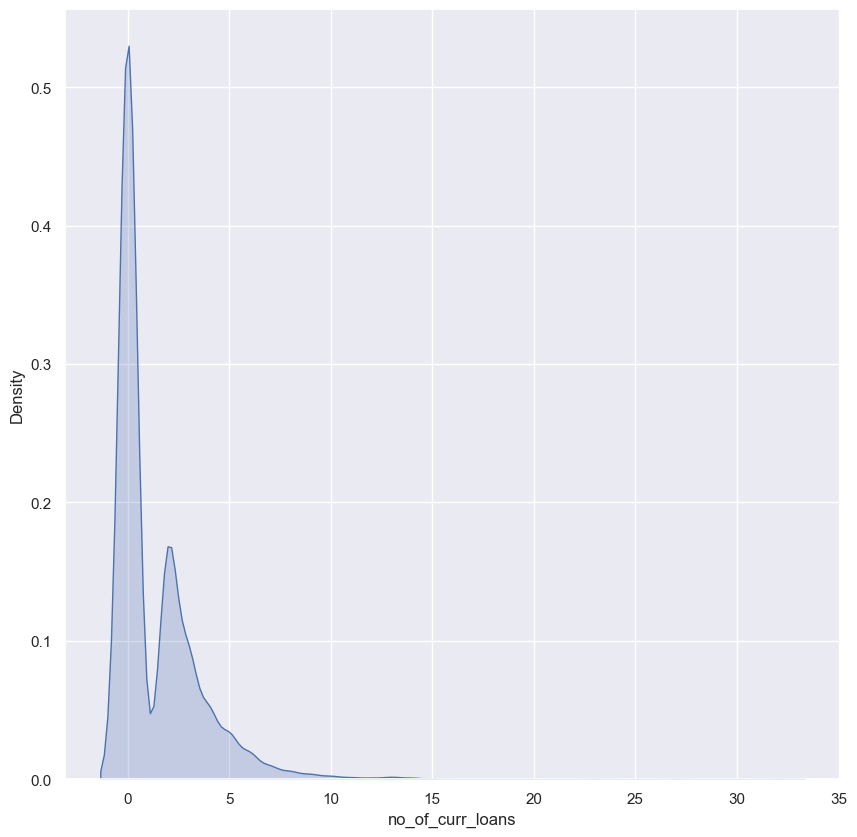

In [33]:
sns.kdeplot(df_test['no_of_curr_loans'], shade=True);
plt.rcParams['figure.figsize'] = (10,10)

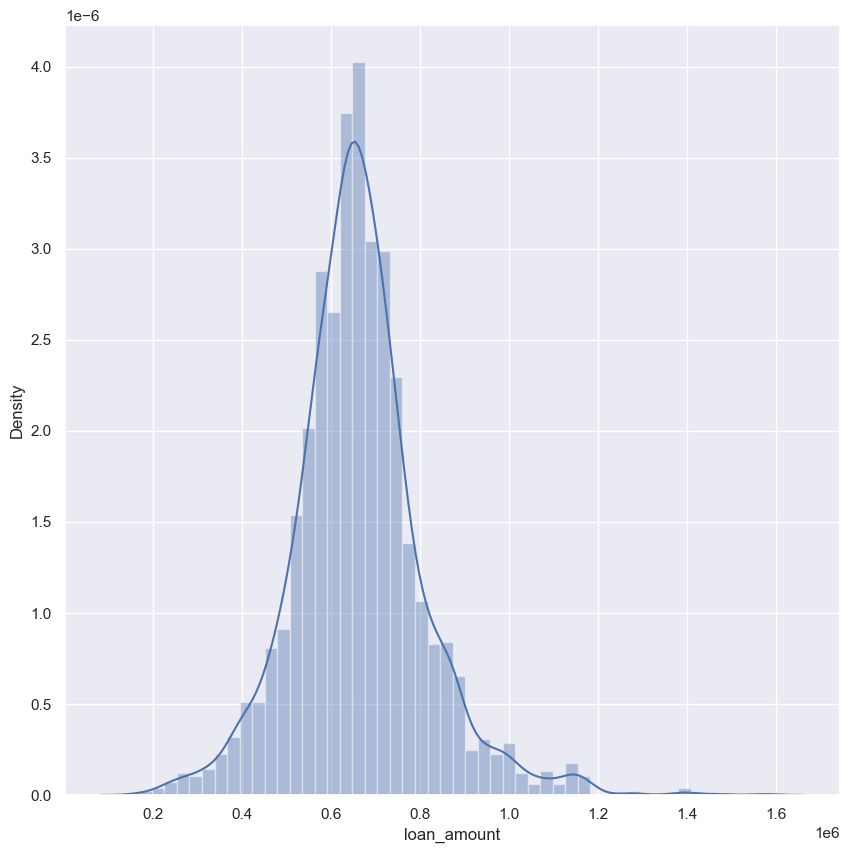

In [34]:
sns.distplot(df_test['loan_amount'])
plt.rcParams['figure.figsize'] = (10,10)

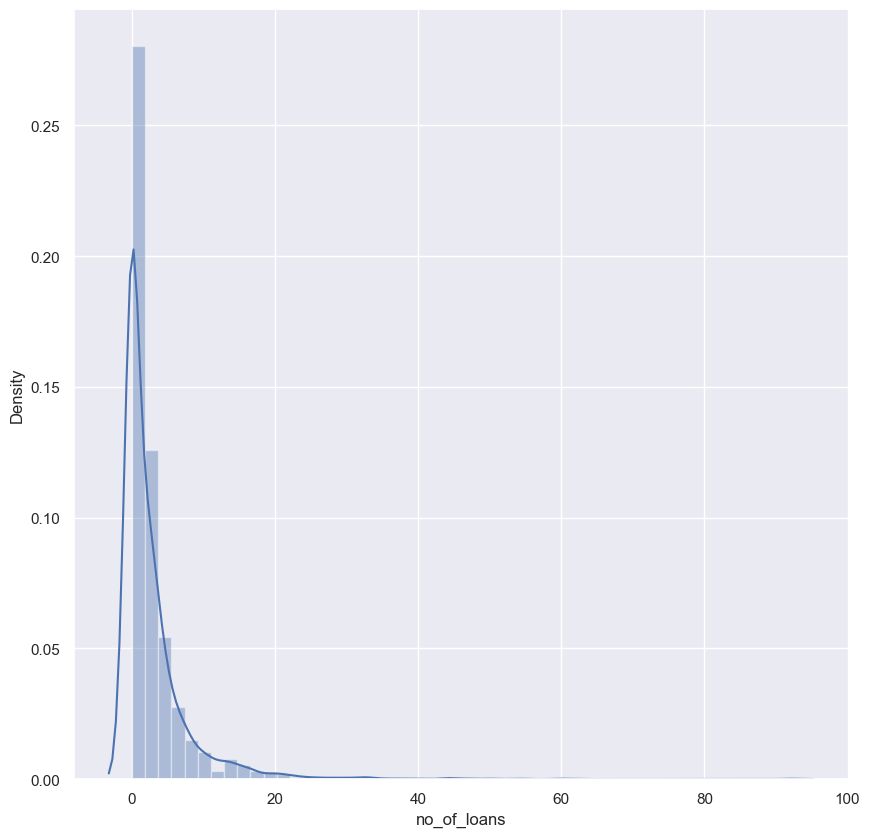

In [35]:
sns.distplot(df_test['no_of_loans'], )
plt.rcParams['figure.figsize'] = (10,10)

In [36]:
,

''

In [37]:
df_train["loan_amount"].count()

7000

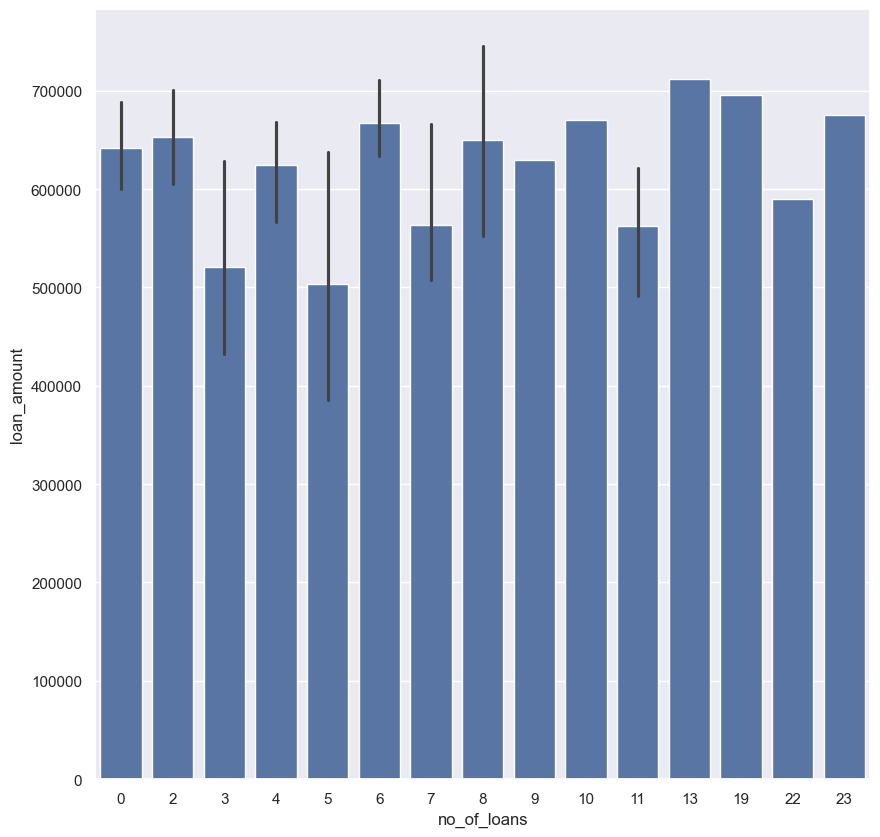

In [38]:
sns.barplot(y="loan_amount", x="no_of_loans",data= df_test[:100] , orient = "vertical")
plt.rcParams['figure.figsize']=(10,5)

<Axes: xlabel='no_of_curr_loans', ylabel='count'>

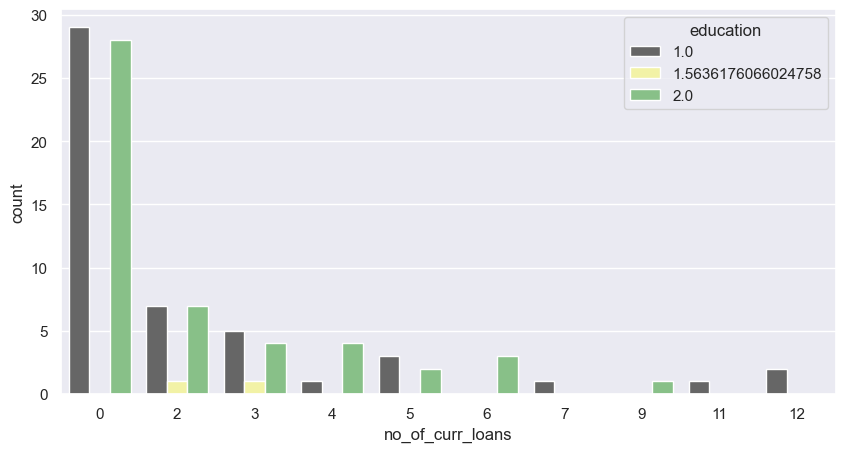

In [39]:
sns.countplot(x="no_of_curr_loans",
    y=None,
    hue="education",
    data=df_test[:100],
    order=None,
    hue_order=None,
    orient=None,
    color="yellow",
    palette="Accent_r",
    saturation=0.75,
    dodge=True,)

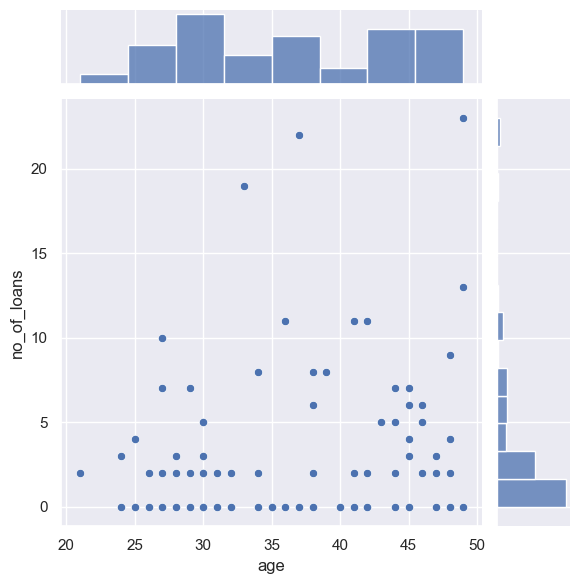

In [40]:
sns.jointplot(y="no_of_loans", x="age",data=df_test[:100]);

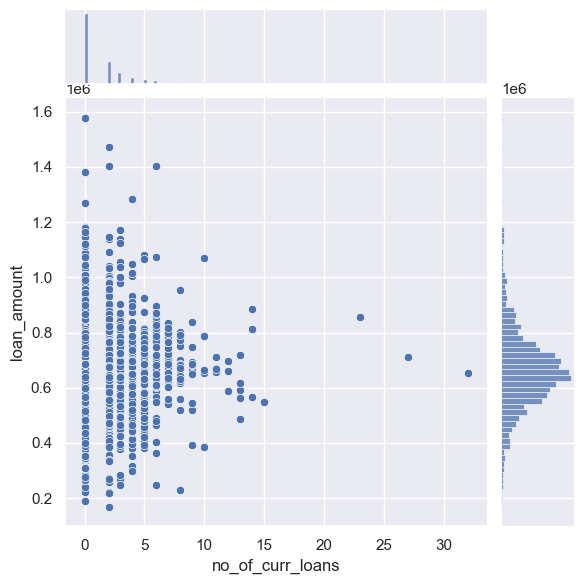

In [41]:
sns.jointplot(x="no_of_curr_loans", y="loan_amount",data=df_test);

In [42]:
df_test["education"].unique()

array([1.        , 2.        , 1.56361761])

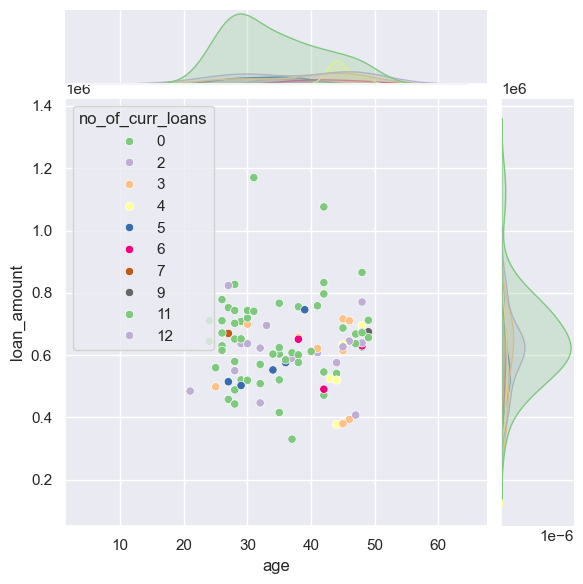

In [43]:
sns.jointplot(x="age", y="loan_amount", hue="no_of_curr_loans",data=df_test[:100], legend ="full" ,palette="Accent")
plt.rcParams['figure.figsize']=(20,7)



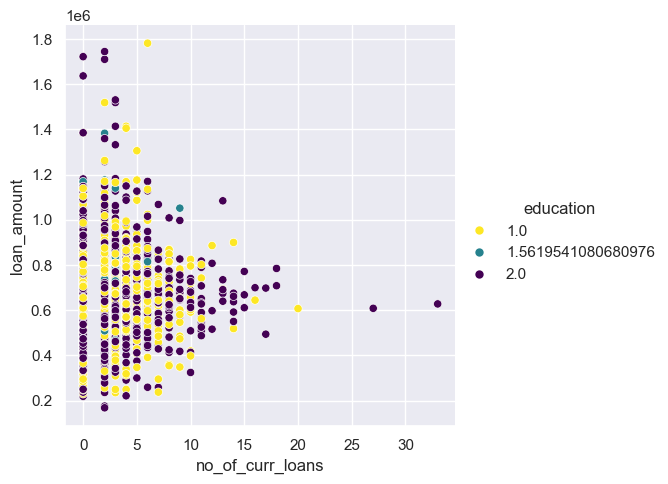

In [44]:
sns.relplot(x="no_of_curr_loans", y="loan_amount", hue="education",data=df_train, palette ="viridis_r")

<h2> <center> OneHot Encoding </center> </h2>

In [45]:
cat_features= {'loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'}


for cat_feature in cat_features:
    print(cat_feature, df_train[cat_feature] . unique() ,sep=":")
    print("#"*50)

loan_amount:[504264 728556 642936 ... 886212 792000 769656]
##################################################
asset_cost:[820920 831444 826092 ... 720336 793860 900660]
##################################################
proof_submitted:['Aadhar' 'VoterID' 'Driving' 'PAN' 'Passport']
##################################################
last_delinq_none:[0 1]
##################################################
age:[27 48 30 28 29 34 46 32 36 25 38 40 41 44 47 33 42 26 45 37 31 43 49 35
 24 50 39 23 22 21]
##################################################
education:[1.         2.         1.56195411]
##################################################
no_of_loans:[  2   6   0   3   7   5   4  13  10   9  12  16   8  11  26  14  20  36
  19  64  55  17  28  44  15  29  18  31  23  22  25  48 109  34  54  39
  21  24  52  30  32  35  57  38  37  40  33  50  46  58  27  41  77  79
  70  43  45]
##################################################
loan_default:[0 1]
###############################

In [46]:
df_train.drop(["loan_id"] ,axis =1 ,inplace =True)

In [47]:
df_train.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,Aadhar,504264,820920,2,2,0,0
1,48,1.0,Aadhar,728556,831444,6,2,0,0
2,30,2.0,VoterID,642936,826092,0,0,0,1
3,28,1.0,Aadhar,746556,930924,0,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [48]:
# Label Encoding
cat_features = ["proof_submitted"]

for cat_feature in cat_features:
    df_train[f"{cat_feature}_cat"] = df_train[cat_feature].astype('category')
    df_train[f"{cat_feature}_cat"] = df_train[f"{cat_feature}_cat"].cat.codes

df_train.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_cat
0,27,1.0,Aadhar,504264,820920,2,2,0,0,0
1,48,1.0,Aadhar,728556,831444,6,2,0,0,0
2,30,2.0,VoterID,642936,826092,0,0,0,1,4
3,28,1.0,Aadhar,746556,930924,0,0,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0,0


In [49]:
df_train.drop(["proof_submitted"], axis =1 ,inplace =True)

In [50]:
df_train.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_cat
0,27,1.0,504264,820920,2,2,0,0,0
1,48,1.0,728556,831444,6,2,0,0,0
2,30,2.0,642936,826092,0,0,0,1,4
3,28,1.0,746556,930924,0,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0,0


In [51]:
cat_features= {'loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none'}


for cat_feature in cat_features:
    print(cat_feature, df_test[cat_feature] . unique() ,sep=":")
    print("#"*50)

loan_amount:[636936 548988 651756 ... 398760 353808 639456]
##################################################
asset_cost:[768240 693060 936600 ... 773088 907728 755160]
##################################################
proof_submitted:['Aadhar' 'VoterID' 'Driving' 'PAN' 'Passport']
##################################################
last_delinq_none:[0 1]
##################################################
age:[29 28 45 48 41 37 42 27 38 35 32 49 31 44 46 30 26 25 36 34 21 47 24 40
 33 43 39 50 23 22]
##################################################
education:[1.         2.         1.56361761]
##################################################
no_of_loans:[ 2  3  0  4 22  6 11 23 10  7  5  9  8 13 19 17 15 20 21 30 18 29 45 16
 38 47 24 26 12 14 28 44 32 34 54 25 31 60 92 33 27 36 50 40]
##################################################
no_of_curr_loans:[ 2  3  0 12  4  9  7  6  5 11 10  8 14 13 15 32 23 27]
##################################################
loan_id:[ 7001  7002  70

In [52]:
df_test.drop(["loan_id"], axis= 1 , inplace =True)

In [53]:
df_test.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,29,1.0,Aadhar,636936,768240,2,2,0
1,28,1.0,Aadhar,548988,693060,3,3,0
2,28,1.0,Aadhar,651756,936600,0,0,0
3,45,2.0,Aadhar,614676,744840,4,3,0
4,48,1.0,Aadhar,625236,839400,0,0,0


In [54]:
# Label Encoding
cat_features = ["proof_submitted"]

for cat_feature in cat_features:
    df_test[f"{cat_feature}_cat"] = df_test[cat_feature].astype('category')
    df_test[f"{cat_feature}_cat"] = df_test[f"{cat_feature}_cat"].cat.codes

df_test.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_cat
0,29,1.0,Aadhar,636936,768240,2,2,0,0
1,28,1.0,Aadhar,548988,693060,3,3,0,0
2,28,1.0,Aadhar,651756,936600,0,0,0,0
3,45,2.0,Aadhar,614676,744840,4,3,0,0
4,48,1.0,Aadhar,625236,839400,0,0,0,0


In [55]:
df_test.drop(["proof_submitted"], axis= 1, inplace =True)

In [56]:
df_test.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_cat
0,29,1.0,636936,768240,2,2,0,0
1,28,1.0,548988,693060,3,3,0,0
2,28,1.0,651756,936600,0,0,0,0
3,45,2.0,614676,744840,4,3,0,0
4,48,1.0,625236,839400,0,0,0,0


In [57]:
df_train.describe()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_cat
count,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000,0.493000
std,7.587700,0.487422,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933,1.241151
min,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000,0.000000
max,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000,4.000000


In [58]:
df_train.isna().sum() | df_test.isna().sum()

age                    False
asset_cost             False
education              False
last_delinq_none       False
loan_amount            False
loan_default           False
no_of_curr_loans       False
no_of_loans            False
proof_submitted_cat    False
dtype: bool

In [59]:
df_train.describe()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_cat
count,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000,0.493000
std,7.587700,0.487422,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933,1.241151
min,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000,0.000000
max,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000,4.000000


<Axes: >

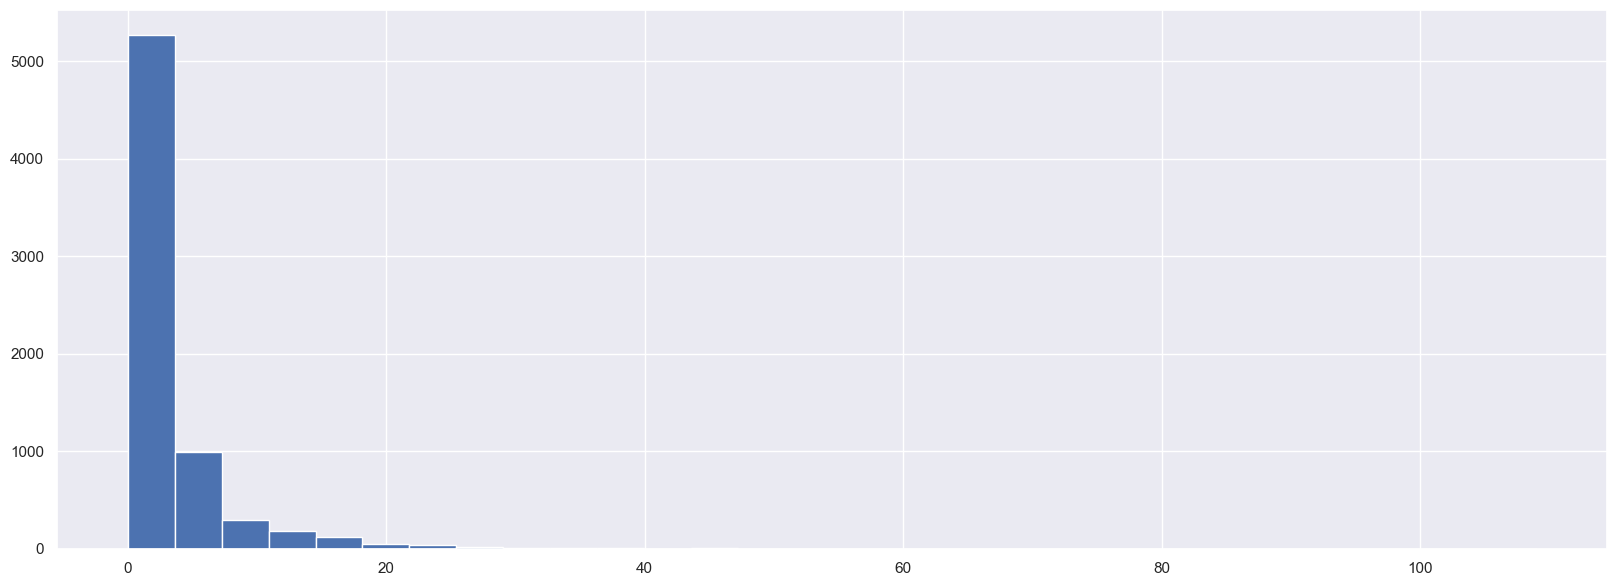

In [60]:
df_train["no_of_loans"].hist(bins=30)

<Axes: >

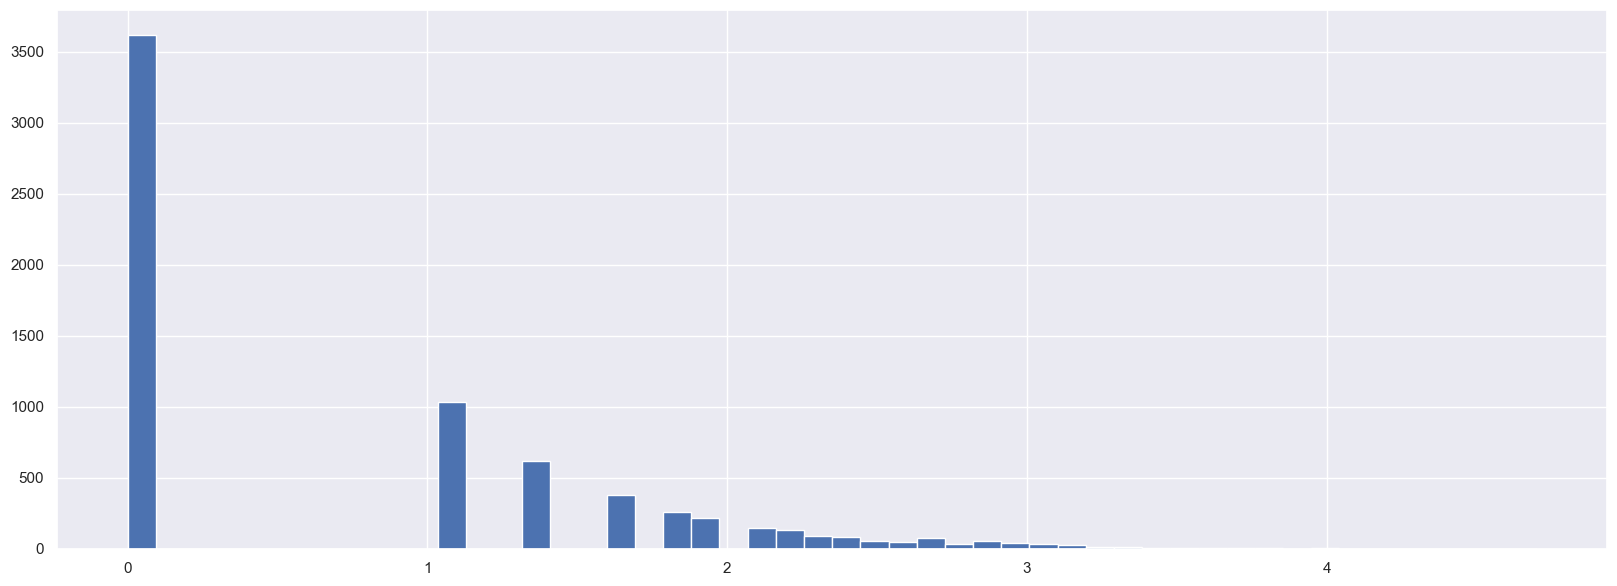

In [61]:
log_no_of_loans= np.log(df_train['no_of_loans'] + 1)
log_no_of_loans.hist(bins=50)


<Axes: >

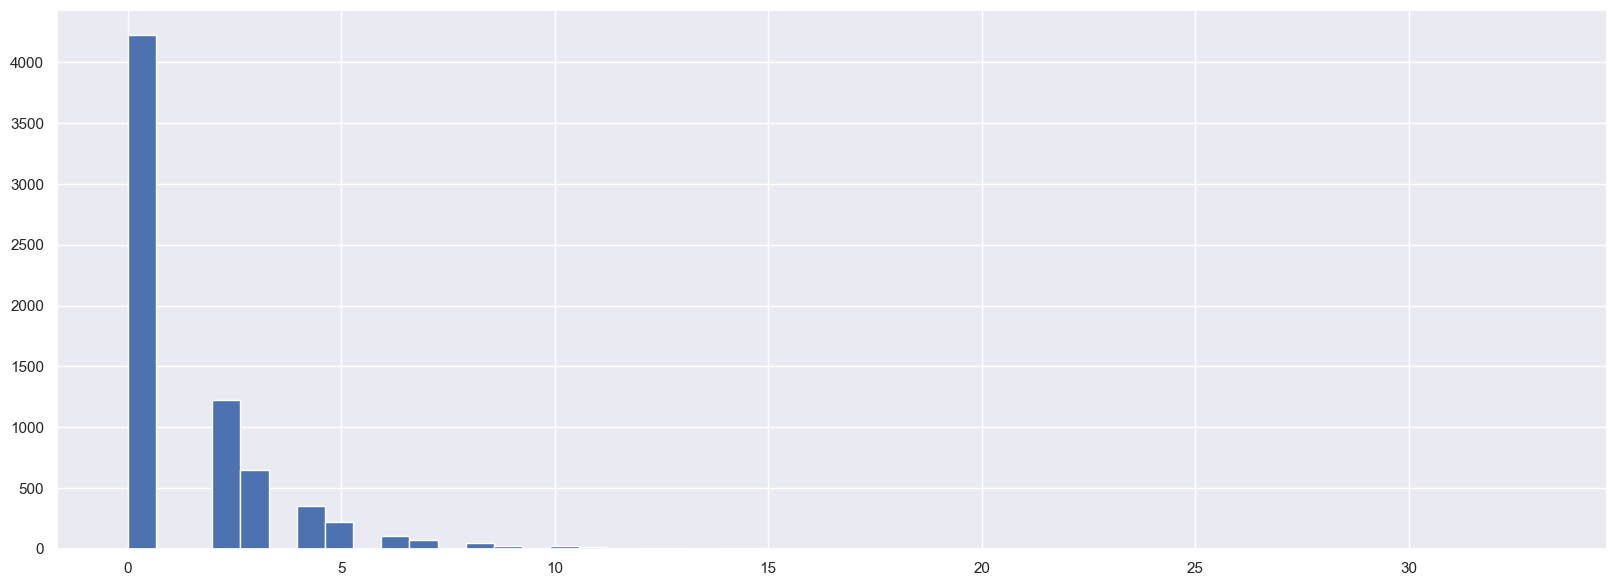

In [62]:
df_train["no_of_curr_loans"].hist(bins=50)

<Axes: >

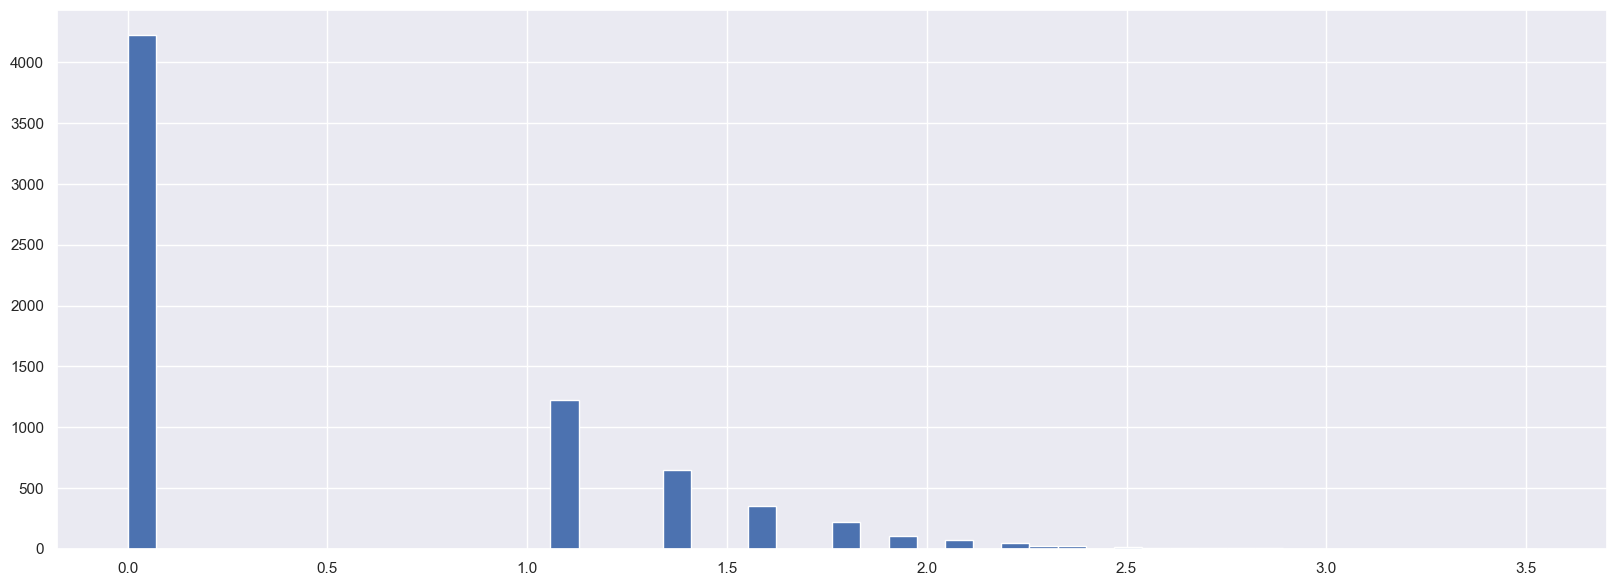

In [63]:
log_no_of_curr_loans = np.log(df_train['no_of_curr_loans'] +1)
log_no_of_curr_loans.hist(bins=50)


In [64]:
df_train.describe()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_cat
count,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000,0.493000
std,7.587700,0.487422,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933,1.241151
min,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000,0.000000
max,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000,4.000000


In [65]:
df_test.describe()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_cat
count,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000
mean,36.111000,1.563618,6.629294e+05,9.106000e+05,2.819000,1.374333,0.014333,0.487333
std,7.467347,0.488354,1.451009e+05,2.070278e+05,5.329575,2.218825,0.118881,1.230858
min,21.000000,1.000000,1.696800e+05,4.706040e+05,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,5.801880e+05,7.930710e+05,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,6.541560e+05,8.569080e+05,0.000000,0.000000,0.000000,0.000000
75%,42.000000,2.000000,7.315590e+05,9.501360e+05,4.000000,2.000000,0.000000,0.000000
max,50.000000,2.000000,1.576920e+06,2.358180e+06,92.000000,32.000000,1.000000,4.000000


## correlation of train dataset


<Axes: >

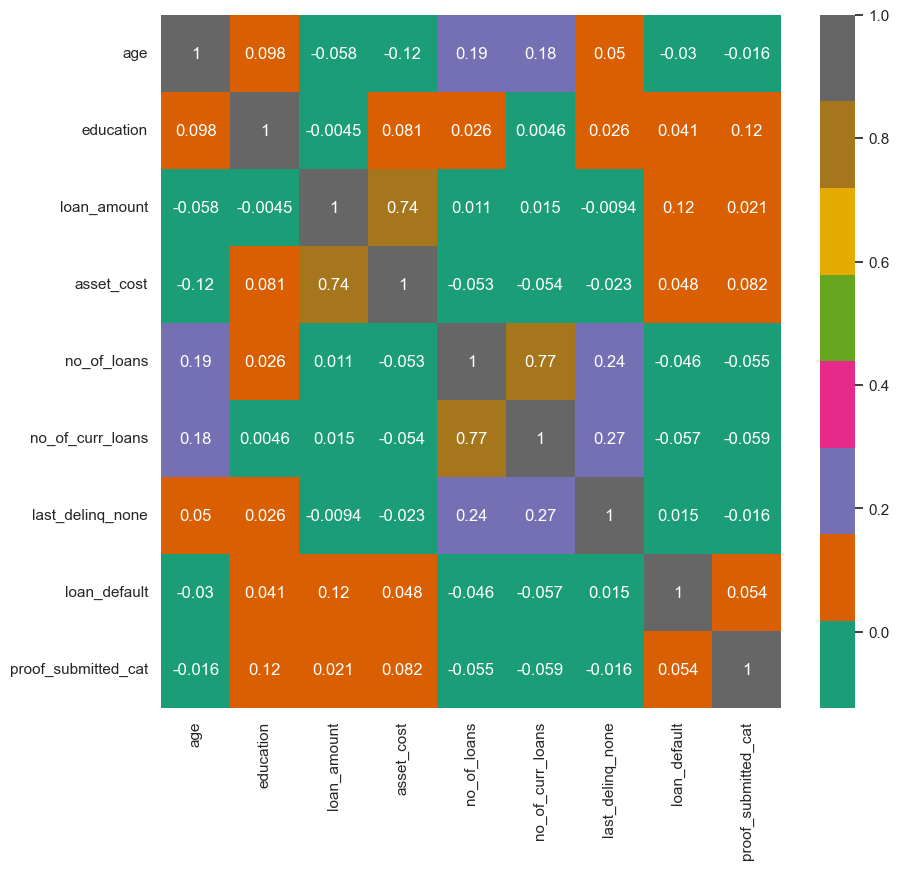

In [66]:
plt.figure(figsize=(10,9))
sns.heatmap(df_train.corr(), cmap = "Dark2" ,annot =True)


<Axes: >

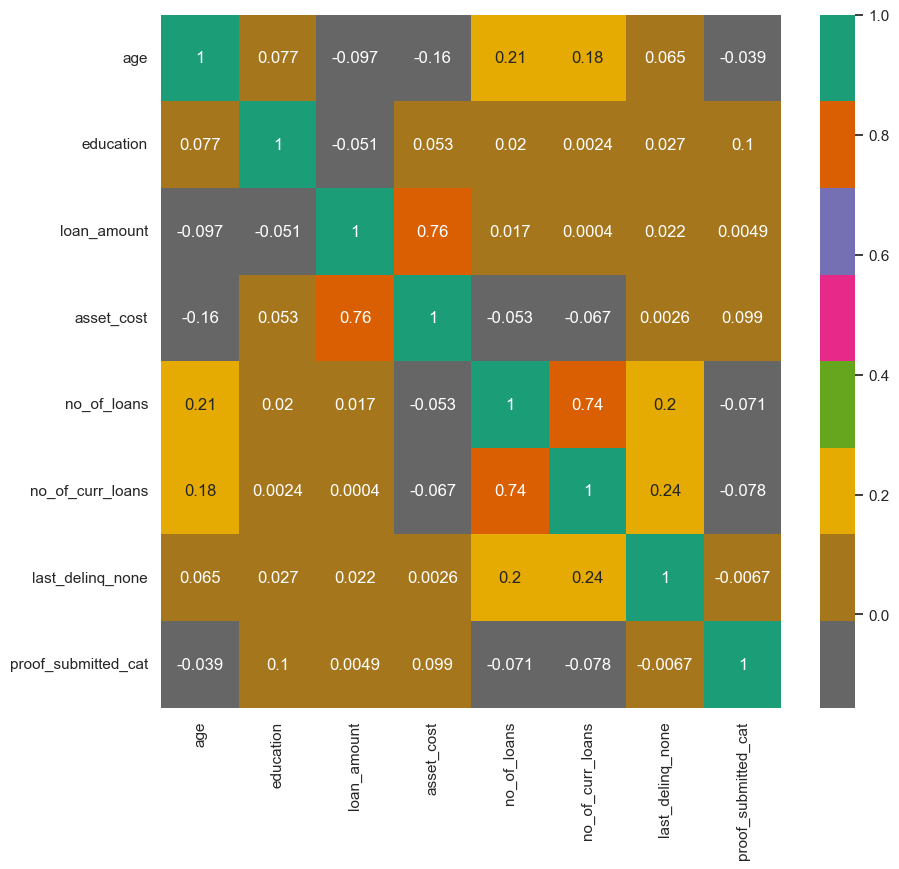

In [67]:
plt.figure(figsize=(10,9))
sns.heatmap(df_test.corr(),cmap="Dark2_r", annot =True)


<h2> <center> Data Segmentation</center> </h2>

In [68]:
y = df_train["loan_default"] # Target
x = df_train.drop("loan_default", axis=1)

In [69]:
scaler = StandardScaler()

In [70]:
x_df_normalize = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x_df_normalize

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_cat
0,-1.198943,-1.152994,-1.062009,-0.444709,-0.155950,0.287265,-0.116037,-0.397240
1,1.568892,-1.152994,0.435246,-0.395640,0.575106,0.287265,-0.116037,-0.397240
2,-0.803538,0.898764,-0.136308,-0.420594,-0.521478,-0.626344,-0.116037,2.825804
3,-1.067142,-1.152994,0.555405,0.068186,-0.521478,-0.626344,-0.116037,-0.397240
4,-0.935340,-1.152994,3.181030,4.595834,-0.521478,-0.626344,-0.116037,-0.397240
...,...,...,...,...,...,...,...,...
6995,1.173487,0.898764,1.786309,1.594783,-0.521478,-0.626344,-0.116037,-0.397240
6996,0.646280,0.898764,0.118509,-0.584024,0.209578,1.200873,-0.116037,-0.397240
6997,1.437090,0.898764,-0.238442,-0.913682,5.875258,4.398503,-0.116037,-0.397240
6998,0.382677,-1.152994,-0.057724,-0.570876,-0.521478,-0.626344,-0.116037,-0.397240


In [71]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [72]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_cat
0,0.206897,0.0,0.208481,0.178620,0.018349,0.060606,0.0,0.0
1,0.931034,0.0,0.347491,0.184029,0.055046,0.060606,0.0,0.0
2,0.310345,1.0,0.294427,0.181278,0.000000,0.000000,0.0,1.0
3,0.241379,0.0,0.358647,0.235153,0.000000,0.000000,0.0,0.0
4,0.275862,0.0,0.602419,0.734203,0.000000,0.000000,0.0,0.0


In [73]:
x.shape

(7000, 8)

In [74]:
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df_normalize, y, test_size=0.25, stratify=y, random_state= 42)

In [75]:
# distribution in training set
y_df_train.value_counts(normalize=True)

loan_default
0    0.6
1    0.4
Name: proportion, dtype: float64

In [76]:
# distribution in test set
y_df_test.value_counts(normalize=True)

loan_default
0    0.6
1    0.4
Name: proportion, dtype: float64

In [77]:
#shape of training set
x_df_train.shape, y_df_train.shape

((5250, 8), (5250,))

In [78]:
# distribution in test set
y_df_test.value_counts(normalize=True)

loan_default
0    0.6
1    0.4
Name: proportion, dtype: float64

In [79]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, class_weight="balanced" ,verbose=3,)
clf.fit(x_df_train, y_df_train)


LogisticRegression(class_weight='balanced', random_state=42, verbose=3)

In [80]:
y_pred = clf.predict(x_df_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [81]:
from sklearn.metrics import f1_score, accuracy_score

# we are using f1_score because 
# this is a classification model

y_pred = clf.predict(x_df_test)

print("F1_score", f1_score(y_df_test,y_pred))
print("accuracy" , accuracy_score(y_df_test,y_pred))

F1_score 0.5439024390243903
accuracy 0.5725714285714286


In [82]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=11,random_state =42)
clf.fit(x_df_train, y_df_train)
y_pred = clf.predict(x_df_test)

print("F1_score", f1_score(y_df_test,y_pred))
print("accuracy" , accuracy_score(y_df_test,y_pred))

F1_score 0.33704020530367834
accuracy 0.5571428571428572


In [83]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(verbose=3,random_state=42,n_estimators=42)
clf.fit(x_df_train, y_df_train)

building tree 1 of 42
building tree 2 of 42
building tree 3 of 42
building tree 4 of 42
building tree 5 of 42
building tree 6 of 42
building tree 7 of 42
building tree 8 of 42
building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42
building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42
building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42
building tree 30 of 42
building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42
building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42
building tree 42 of 42


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s


RandomForestClassifier(n_estimators=42, random_state=42, verbose=3)

In [84]:
y_pred = clf.predict(x_df_test)
print("accuracy_score", accuracy_score(y_df_test, y_pred))
print("f1_score", f1_score(y_df_test, y_pred))

accuracy_score 0.5748571428571428
f1_score 0.36192109777015435


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s


In [85]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [86]:
# Creating instance of KNN
clf = KNN(leaf_size =3,p=1,weights="distance",n_jobs=-1,algorithm= 'brute')

# Fitting the model
clf.fit(x_df_train, y_df_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x_df_train) 
print("accuracy_score", accuracy_score(y_df_test, y_pred))
k = f1_score(test_predict, y_df_train)
print('Test F1 Score    ', k )

accuracy_score 0.5748571428571428
Test F1 Score     1.0


In [87]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i,leaf_size =11,algorithm= 'brute') , X = x_df_train, y = y_df_train, cv = 10)

    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [88]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors=3,weights="distance",n_jobs=-1,algorithm= 'brute'), X= x_df_train, y = y_df_train , cv =17)
score.mean()

0.541710859100922

In [89]:
n_neighbors = range(1,30)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

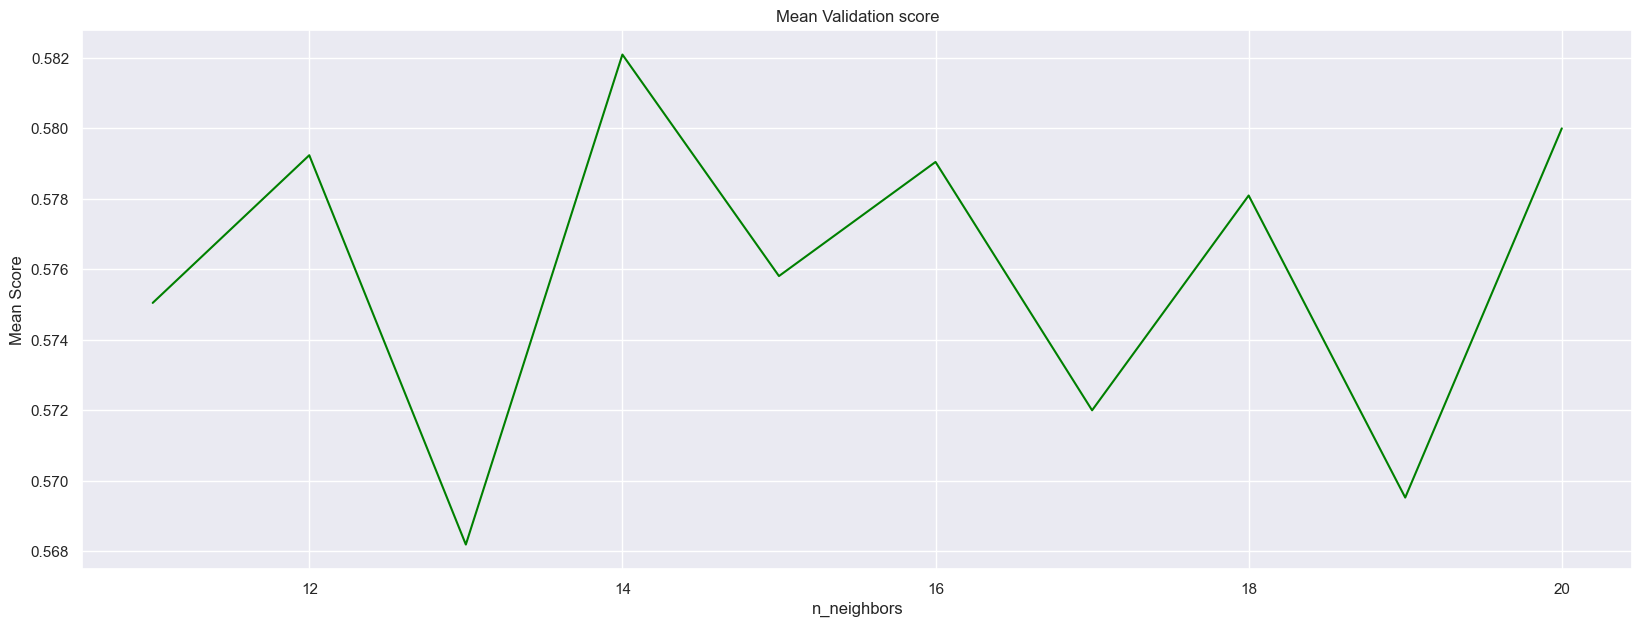

In [90]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

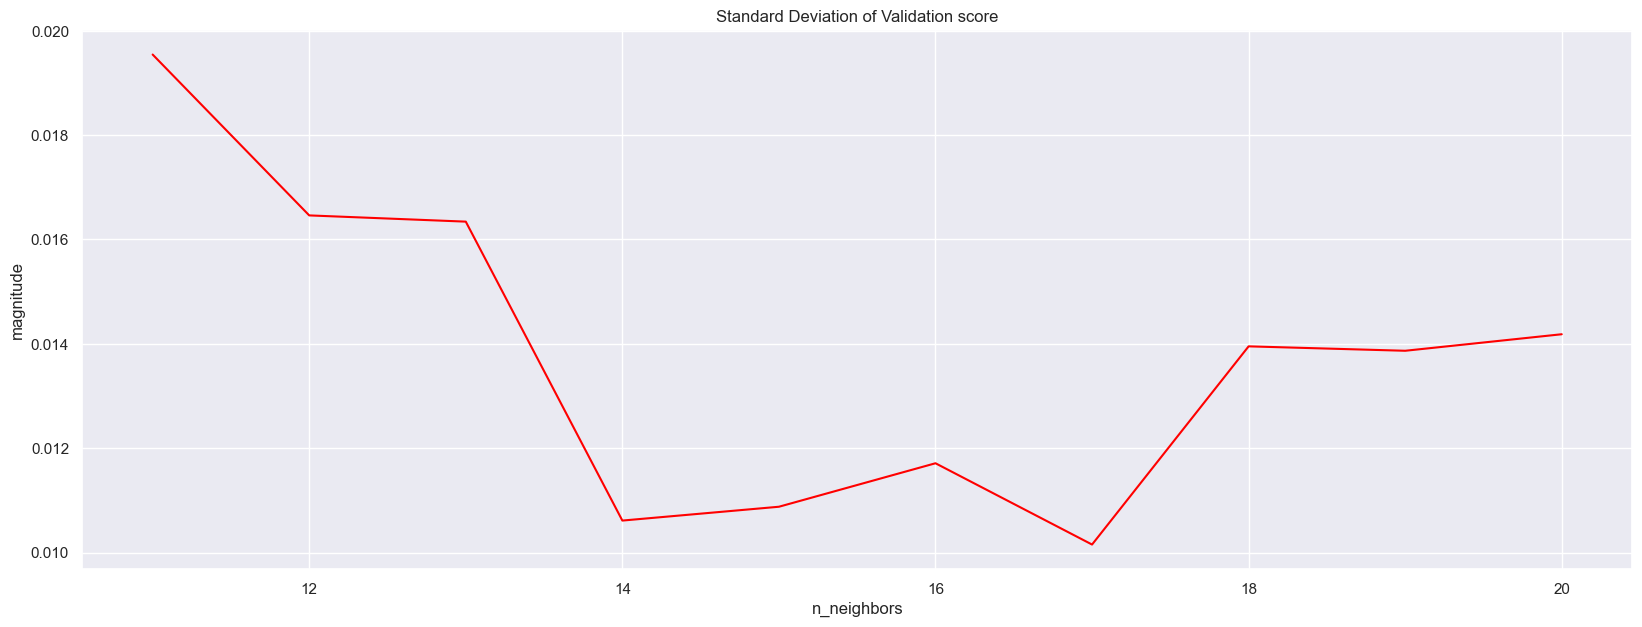

In [91]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

In [92]:
clf = KNN(n_neighbors = 13)
clf.fit(x_df_train, y_df_train)

score = clf.score(x_df_train, y_df_train)

score

0.663047619047619

In [93]:
clf = KNN(n_neighbors = 17)
clf.fit(x_df_train, y_df_train)

score1 = clf.score(x_df_train, y_df_train)
score1

0.6417142857142857

In [95]:
import lightgbm
import time

start = time.time()
lgbm = lightgbm.LGBMClassifier(n_estimators=45,num_leaves=10, boosting_type = 'goss',class_weight="balanced", reg_alpha= 0.1,reg_lambda= 0.5, random_state= 42 )

lgbm.fit(x_df_train ,y_df_train)
y_pred =lgbm.predict(x_df_test)

print("accuracy_score", accuracy_score(y_df_test, y_pred))
print("f1_score", f1_score(y_df_test, y_pred))

end =time.time()
diff =end - start
print("Execution time :", diff)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 2100, number of negative: 3150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 5250, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards co

In [96]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start = time.time()
gbm = GradientBoostingClassifier(n_estimators =1000)

gbm.fit(x_df_train ,y_df_train)
y_pred =gbm.predict(x_df_test)

print("accuracy_score", accuracy_score(y_df_test, y_pred))
print("f1_score", f1_score(y_df_test, y_pred))


end =time.time()
diff =end - start
print("Execution time :", diff)

accuracy_score 0.5611428571428572
f1_score 0.350253807106599
Execution time : 9.528568744659424


In [98]:
def cv_score(ml_model, rstate = 11, cols = x.columns):
    i = 1
    cv_scores = []
    df1 = df_train.copy()
    df1 = df_train[cols]
    
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(df1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        Accuracy_score =accuracy_score(yvl,pred_val)
        F1_score = f1_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "f1_score: {:.4} ".format(F1_score)
        msg +="accuracy_score:{:.4}".format(Accuracy_score)
        print("{}".format(msg))
     
    # Save scores
        cv_scores.append(F1_score,)
        i+=1 
    return cv_scores

In [99]:
baseline_scores = cv_score(LogisticRegression())


1 of kfold 5
f1_score: 0.1433 accuracy_score:0.6157

2 of kfold 5
f1_score: 0.1085 accuracy_score:0.6007

3 of kfold 5
f1_score: 0.169 accuracy_score:0.5714

4 of kfold 5
f1_score: 0.1282 accuracy_score:0.5921

5 of kfold 5
f1_score: 0.2037 accuracy_score:0.6036


In [100]:
random_forest =cv_score(RandomForestClassifier())


1 of kfold 5
f1_score: 0.3546 accuracy_score:0.5736

2 of kfold 5
f1_score: 0.3789 accuracy_score:0.5879

3 of kfold 5
f1_score: 0.3269 accuracy_score:0.55

4 of kfold 5
f1_score: 0.372 accuracy_score:0.5707

5 of kfold 5
f1_score: 0.3629 accuracy_score:0.5736


In [101]:
knn_score = cv_score(KNN(n_neighbors=3 ,leaf_size=11,p=2,weights="distance",n_jobs=-1,algorithm= 'brute'))


1 of kfold 5
f1_score: 0.4189 accuracy_score:0.56

2 of kfold 5
f1_score: 0.4284 accuracy_score:0.5579

3 of kfold 5
f1_score: 0.4176 accuracy_score:0.5357

4 of kfold 5
f1_score: 0.4161 accuracy_score:0.545

5 of kfold 5
f1_score: 0.4371 accuracy_score:0.5714


In [102]:
GBM =cv_score(GradientBoostingClassifier(n_estimators=42,loss= 'exponential',random_state=1,criterion= 'squared_error'))


1 of kfold 5
f1_score: 0.2043 accuracy_score:0.605

2 of kfold 5
f1_score: 0.1738 accuracy_score:0.5993

3 of kfold 5
f1_score: 0.2014 accuracy_score:0.5807

4 of kfold 5
f1_score: 0.1362 accuracy_score:0.6014

5 of kfold 5
f1_score: 0.1453 accuracy_score:0.605


In [103]:
DTC=cv_score(DecisionTreeClassifier(max_depth=10))


1 of kfold 5
f1_score: 0.3646 accuracy_score:0.5743

2 of kfold 5
f1_score: 0.2988 accuracy_score:0.5943

3 of kfold 5
f1_score: 0.4108 accuracy_score:0.5471

4 of kfold 5
f1_score: 0.2249 accuracy_score:0.5814

5 of kfold 5
f1_score: 0.2815 accuracy_score:0.5807


In [104]:
lLGBM = cv_score(lightgbm.LGBMClassifier(n_estimators=42,num_leaves=10, boosting_type = 'goss',class_weight="balanced", reg_alpha= 0.1,reg_lambda= 0.1, random_state= 42 )
)


1 of kfold 5
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 2259, number of negative: 3341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training

In [105]:
from sklearn.feature_selection import RFE


# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x, y)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [106]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x.columns
ranking_df['Rank'] = rfe.ranking_

In [107]:
ranked = ranking_df.sort_values(by=['Rank'])

In [108]:
ranked

,Feature_name,Rank
2,loan_amount,1
5,no_of_curr_loans,2
3,asset_cost,3
4,no_of_loans,4
6,last_delinq_none,5
7,proof_submitted_cat,6
1,education,7
0,age,8


In [109]:
rfe_top_10_scores = cv_score(LogisticRegression() , cols = ranked['Feature_name'][:9].values)


1 of kfold 5
f1_score: 0.1433 accuracy_score:0.6157

2 of kfold 5
f1_score: 0.1085 accuracy_score:0.6007

3 of kfold 5
f1_score: 0.1692 accuracy_score:0.5721

4 of kfold 5
f1_score: 0.1282 accuracy_score:0.5921

5 of kfold 5
f1_score: 0.2037 accuracy_score:0.6036


In [110]:
rfe_top_scores1 = cv_score(RandomForestClassifier(n_estimators=20) ,cols =ranked["Feature_name"][:9].values)


1 of kfold 5
f1_score: 0.3054 accuracy_score:0.5614

2 of kfold 5
f1_score: 0.3858 accuracy_score:0.5929

3 of kfold 5
f1_score: 0.3301 accuracy_score:0.5536

4 of kfold 5
f1_score: 0.361 accuracy_score:0.56

5 of kfold 5
f1_score: 0.3578 accuracy_score:0.5693


In [111]:
rfe_top_scores2 = cv_score(KNN(n_neighbors = 3,leaf_size=11) ,cols =ranked["Feature_name"][:9].values)


1 of kfold 5
f1_score: 0.4031 accuracy_score:0.5579

2 of kfold 5
f1_score: 0.4152 accuracy_score:0.5593

3 of kfold 5
f1_score: 0.4211 accuracy_score:0.5464

4 of kfold 5
f1_score: 0.4247 accuracy_score:0.5607

5 of kfold 5
f1_score: 0.4216 accuracy_score:0.5707


In [112]:
df_pred = clf.predict(df_test)

In [113]:
df_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)